In [18]:
import sys
sys.path.append('..')
import torch
from pathlib import Path
from streaming.b3_streamer_v4 import build_dualstreamer_from_file
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

In [36]:
multistreamer, configs = build_dualstreamer_from_file('tm1k.yaml', base_dir='/data/common/b3_model_package_20231207')

Loaded model parameters from /data/common/b3_model_package_20231207/vocoder2/best_mel_ckpt.pkl.


In [37]:
input_example='/data/common/b3_model_package_20231207/hgr_sample.npy'
ecog = np.load(input_example)[:]

In [38]:
multistreamer.clear_cache()
buffer_size = configs['buffer_size']
input_all = ecog

wavs = []
times = []
for i in range(0,int(len(ecog)//buffer_size*buffer_size),buffer_size):
    x = input_all[i:i+buffer_size]
    outputs = multistreamer(x)
    wav= outputs['wav']
    text=outputs['text']
    times.append(outputs['time'])
    print(f'PRED[{int(1/200*i*1000):03d}ms]-', f'{abs(wav).mean():.02f}', text)
    wavs.append(wav)

# clearing buffer
for i in range(30):
    wavs.append(multistreamer(None)['wav'])
wavs = np.concatenate(wavs)

PREDs]- 0.01 
PREDs]- 0.01 
PREDs]- 0.00 
PREDs]- 0.00 
PREDs]- 0.00 
PREDs]- 0.00 
PREDs]- 0.00 
PREDs]- 0.00 
PREDs]- 0.00 
PREDs]- 0.00 
PREDs]- 0.00 
PREDs]- 0.00 
PREDs]- 0.00 
PRED[1040ms]- 0.00 
PRED[1120ms]- 0.00 
PRED[1200ms]- 0.00 
PRED[1280ms]- 0.00 
PRED[1360ms]- 0.00 
PRED[1440ms]- 0.00 
PRED[1520ms]- 0.00 
PRED[1600ms]- 0.00 
PRED[1680ms]- 0.00 
PRED[1760ms]- 0.00 
PRED[1840ms]- 0.00 
PRED[1920ms]- 0.00 
PRED[2000ms]- 0.00 
PRED[2080ms]- 0.00 
PRED[2160ms]- 0.00 
PRED[2240ms]- 0.08 
PRED[2320ms]- 0.15 
PRED[2400ms]- 0.18 i
PRED[2480ms]- 0.18 i
PRED[2560ms]- 0.15 i
PRED[2640ms]- 0.10 i
PRED[2720ms]- 0.07 i
PRED[2800ms]- 0.06 i
PRED[2880ms]- 0.07 i
PRED[2960ms]- 0.02 i should
PRED[3040ms]- 0.01 i should
PRED[3120ms]- 0.01 i should
PRED[3200ms]- 0.06 i should
PRED[3280ms]- 0.07 i should
PRED[3360ms]- 0.03 i should
PRED[3440ms]- 0.05 i should
PRED[3520ms]- 0.14 i should
PRED[3600ms]- 0.24 i should
PRED[3680ms]- 0.15 i should
PRED[3760ms]- 0.20 i should be
PRED[3840ms]- 0.19 i

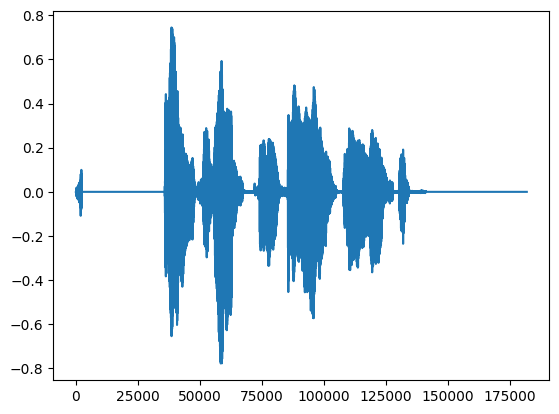

In [39]:
plt.plot(wavs)

ipd.display(ipd.Audio(wavs[:], rate=16000))

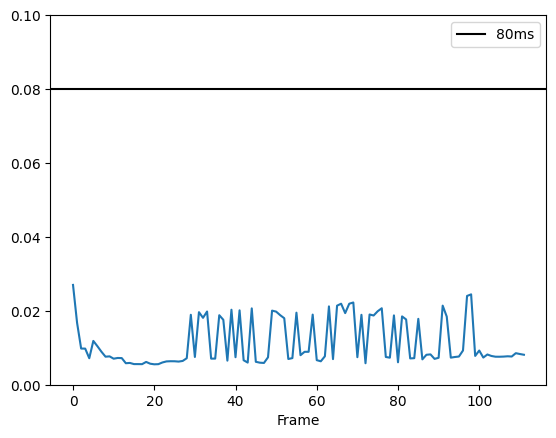

In [23]:
plt.plot(times[:])
plt.ylim(0,0.1)
plt.axhline(0.08,label='80ms',color='k')
plt.xlabel('Frame')
plt.legend()